In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing stats library
from scipy import stats
import statsmodels.api as sm
#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

## 1.  Loading The Data

In [4]:
df_leads=pd.read_csv('F:\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [5]:
df_leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 2. Exploratory Data Analysis

#### Inspecting The Dataset

In [6]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Shape Of The Data Frame
df_leads.shape

(9240, 37)

In [8]:
# Checking The Summary Of The Features Of the Data Frame
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Reviewing The Feature Types and Checking If Any Null Values Are Present
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Checking If There Are Any Duplicated Data
df_leads[df_leads.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


The dataset has no duplicate rows, but there are some missing values to handle

### Handling Missing Values

In [11]:
# Distribution Of Null values across all the columns
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# check for percentage of null values in each column
percentage = round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)
print(percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Some columns have too many missing values, making them less useful for analysis. Dropping columns with more than 35% missing data.

In [13]:
# Calculate the percentage of null values in each column
null_percentage = df_leads.isnull().mean() * 100

# List to store names of dropped columns
dropped_columns = []

# Loop through each column
for column in df_leads.columns:
    if null_percentage[column] > 30:  # Check percentage for the column
        dropped_columns.append(column)  # Append the column name
        df_leads.drop(columns=column, inplace=True)  # Drop the column

# Print the dropped columns
print("Dropped columns:", dropped_columns)


Dropped columns: ['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [14]:
# Calculate the percentage of missing values in each column, rounded to two decimal places, after dropping the above columns
missing_values_percentage = round(100 * (df_leads.isnull().sum() / len(df_leads.index)), 2)

# Print the missing values percentage
print(missing_values_percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [15]:
# City Wise Distribution Of Data
df_leads['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

The 'City' column has many missing values, a high number of entries marked as "Select," and Mumbai represents the majority of the leads. To simplify the dataset and avoid bias, it's best to drop this column

In [16]:
# Country Wise Distribution Of Data
df_leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

Since most of the data in the "Country" column is from India and there's a lot of missing information, it's best to drop this column. This will simplify the dataset and make the analysis more relevant.

In [17]:
# Dropping City And Country Features
df_leads.drop(['City','Country'], axis = 1, inplace = True)

In [18]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [19]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [20]:
df_leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

It is noticed that "Google" appears with different cases. To standardize, we'll convert all instances of "Google" to a single case. 

In [21]:
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google', 'Google')

Also since we have 36 null values and "Google" is the most frequent value, we can fill the nulls with "Google" to ensure consistency and utilize the most common value.

In [22]:
mode_value = df_leads['Lead Source'].mode()[0]
df_leads['Lead Source'].fillna(mode_value, inplace=True)

In [23]:
df_leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [24]:
# Function to calculate percentiles
def calculate_summary(column):
    return column.quantile([0.25, 0.5, 0.75, 0.90])

# Summary for 'TotalVisits' and 'Page Views Per Visit'
summary_total_visits = calculate_summary(df_leads['TotalVisits'])
summary_page_views_per_visit = calculate_summary(df_leads['Page Views Per Visit'])


Now consider two numerical features, 'TotalVisits' and 'Page Views Per Visit'. To check the presence of outliers and decide between using the mean or median for imputing missing values, we calculate quantiles.

In [25]:
quantiles_tv=df_leads['TotalVisits'].quantile([0,0.25,0.50,0.75,0.90,1])
quantiles_tv.index = ['Min (0%)', '25th Percentile', '50th Percentile (Median)', '75th Percentile', '90th Percentile','Max']
print("Quantiles of 'TotalVisits':\n", quantiles_tv)

Quantiles of 'TotalVisits':
 Min (0%)                      0.0
25th Percentile               1.0
50th Percentile (Median)      3.0
75th Percentile               5.0
90th Percentile               7.0
Max                         251.0
Name: TotalVisits, dtype: float64


Here clearly we see that 'TotalVisits' feature has outliers. So we use median to fill the null values

In [26]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].median(),inplace=True)

In [27]:
quantiles_pv=df_leads['Page Views Per Visit'].quantile([0,0.25,0.50,0.75,0.90,1])
quantiles_pv.index = ['Min (0%)', '25th Percentile', '50th Percentile (Median)', '75th Percentile', '90th Percentile','Max']
print("Quantiles of 'Page Views Per Visit':\n", quantiles_pv)

Quantiles of 'Page Views Per Visit':
 Min (0%)                     0.0
25th Percentile              1.0
50th Percentile (Median)     2.0
75th Percentile              3.0
90th Percentile              5.0
Max                         55.0
Name: Page Views Per Visit, dtype: float64


Here clearly we see that 'Page Views Per Visit' feature has outliers. So we use median to fill the null values

In [28]:
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(),inplace=True)

In [29]:
# Distribution of categories across the column Last Activity

df_leads['Last Activity'].astype('category').value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

Since we don't have information on the last activity of the customer, we can handle the null values by introducing a new category labeled 'N/A'. This will help in retaining those records for analysis rather than discarding them

In [30]:
df_leads['Last Activity'].fillna('N/A',inplace=True)
df_leads['Last Activity'].astype('category').value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
N/A                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [31]:
# Distribution of categories across the column "What is your current Occupation"

df_leads['What is your current occupation'].astype('category').value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

Since we don't have information on the current occupation of the customer, we can handle the null values by introducing a new category labeled 'Unknown'. This will help in retaining those records for analysis rather than discarding them

In [32]:
df_leads['What is your current occupation'].fillna('Unknown',inplace=True)
df_leads['What is your current occupation'].astype('category').value_counts()

What is your current occupation
Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
# Distribution of categories across the column What matters most to you in choosing a course 

df_leads['What matters most to you in choosing a course'].astype('category').value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [34]:
 round(100 * len(df_leads[df_leads['What matters most to you in choosing a course']  == 'Better Career Prospects']) / len(df_leads['What matters most to you in choosing a course']), 2)

70.65

'Better Career Prospects' makes up about 70% of the responses in the 'What matters most to you in choosing a course' column, and 29% of the data is missing. Given these factors, we'll drop this column to clean up our dataset.

In [35]:
df_leads.drop(['What matters most to you in choosing a course'], axis=1,inplace=True)

### Visualization of 'Select' Values Across Key Columns

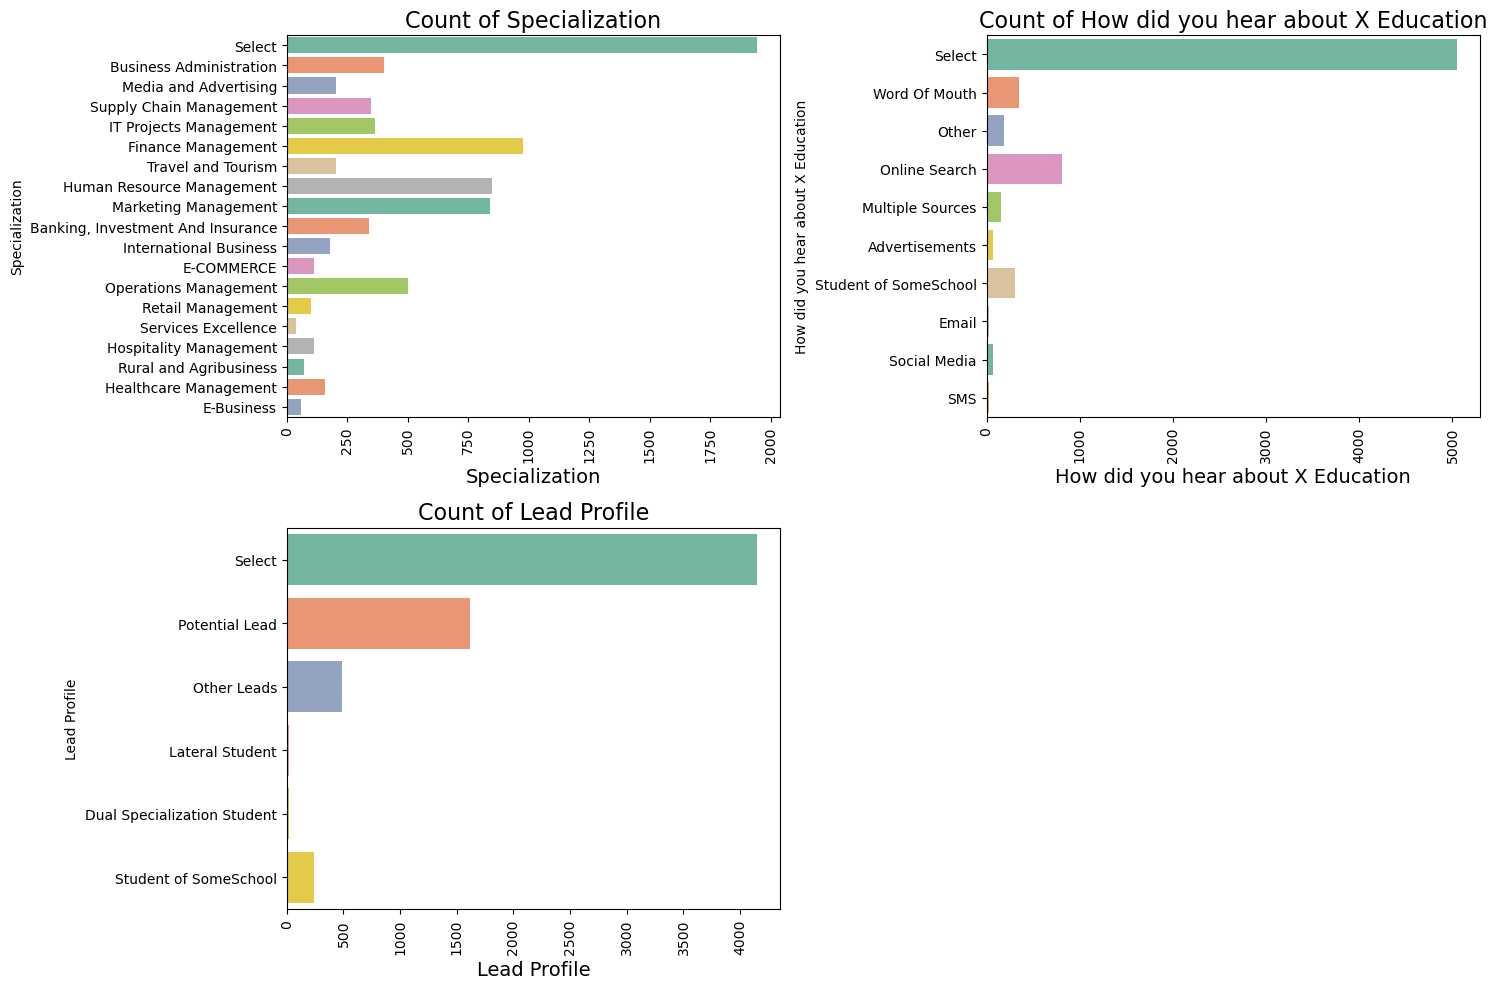

In [36]:
def countplot(x, fig):
    plt.subplot(2, 2, fig)  # Correct usage of subplot
    sns.countplot(y=df_leads[x],palette='Set2')
    plt.title('Count of' + ' ' + x, size=16)
    plt.xlabel(x, size=14)
    plt.xticks(rotation=90)

# Create the figure and set the size
plt.figure(figsize=(15, 10))

# Call the countplot function for different columns
countplot('Specialization', 1)
countplot('How did you hear about X Education', 2)
countplot('Lead Profile', 3)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


In [37]:
#Distribution of Categories in 'Lead Profile'
df_leads['Lead Profile'].astype('category').value_counts(dropna=False)

Lead Profile
Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [38]:
#Distribution of Categories in 'How did you hear about X Education'
df_leads['How did you hear about X Education'].astype('category').value_counts(dropna=False)

How did you hear about X Education
Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [39]:
#Distribution of Categories in 'Specialization'
df_leads['Specialization'].astype('category').value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

The following columns contain the value 'select,' which indicates that the customer did not choose an option. We will convert these 'select' values to NaN to accurately reflect the missing data

In [40]:
df_leads['Specialization'] = df_leads['Specialization'].replace('Select', np.nan)
df_leads['How did you hear about X Education'] = df_leads['How did you hear about X Education'].replace('Select', np.nan)
df_leads['Lead Profile'] = df_leads['Lead Profile'].replace('Select', np.nan)

In [41]:
# Calculating percentage Of Null Values in these columns
null_percentage = df_leads[['Specialization', 'How did you hear about X Education', 'Lead Profile']].isnull().mean() * 100
print("Percentage of null values in the columns:")
print(null_percentage)

Percentage of null values in the columns:
Specialization                        36.580087
How did you hear about X Education    78.463203
Lead Profile                          74.188312
dtype: float64


As all the three columns has more than 30% of null values, we drop them

In [42]:
#Dropping 'Lead Profile' and 'How Did You Hear About X Education' due to a high number of values belonging to the 'select' category
df_leads.drop(['Lead Profile', 'How did you hear about X Education','Specialization'], axis = 1, inplace = True)

In [43]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the missing values in the dataset have been sucessfully handled

### Outliers Detection

In [44]:
#We'll identify outliers by examining the values at the 25th, 50th, 75th, 90th, and 95th percentiles, and flag any values that fall significantly above the thresholds as outliers.
df_leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


Based on the summary, outliers are present in the 'TotalVisits' and 'Page Views Per Visit' columns

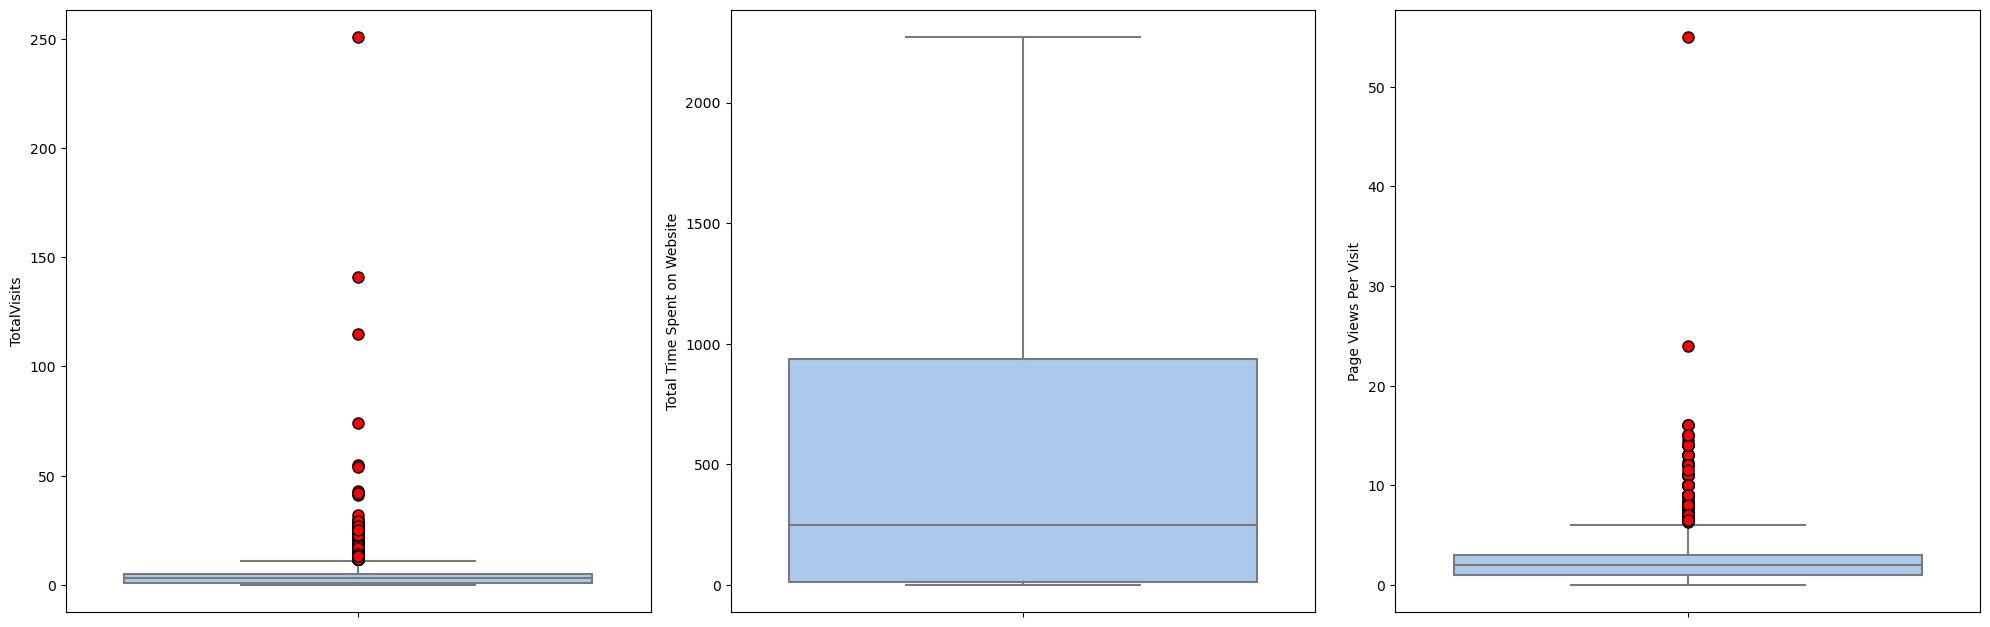

In [45]:
# Visualization Of Outliers Using Boxplots
outlier_props = dict(marker='o', markerfacecolor='#FF0000', markeredgecolor='black', markersize=8)
plt.figure(figsize=(20, 25))
plt.subplot(4, 3, 1)
sns.boxplot(y='TotalVisits', palette='pastel', data=df_leads, flierprops=outlier_props)
plt.subplot(4, 3, 2)
sns.boxplot(y='Total Time Spent on Website', palette='pastel', data=df_leads, flierprops=outlier_props)
plt.subplot(4, 3, 3)
sns.boxplot(y='Page Views Per Visit', palette='pastel', data=df_leads, flierprops=outlier_props)
plt.tight_layout()
plt.show()

The plots clearly depict the presence of outliers in 'TotalVisits' and 'Page Views Per Visit'

In [46]:
# Removing outliers beyond the 99th percentile for the 'TotalVisits' column
nn_quartile_total_visits = df_leads['TotalVisits'].quantile(0.99)
df_leads = df_leads[df_leads["TotalVisits"] < nn_quartile_total_visits]
df_leads["TotalVisits"].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [47]:
# Removing outliers beyond the 99th percentile for the 'Page Views Per Visit' column
nn_quartile_page_views = df_leads['Page Views Per Visit'].quantile(0.99)
df_leads = df_leads[df_leads["Page Views Per Visit"] < nn_quartile_page_views]
df_leads["Page Views Per Visit"].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [48]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df_leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


All The Outliers Have Been Handled Successfully!!!

In [49]:
# Calculate the percentage of data retained after Handling Missing Values and outliers
# The original dataset had 9240 entries
original_data_size = 9240
retained_percentage = round(100 * (len(df_leads) / original_data_size), 2)
print(f"Percentage of data retained after cleaning the data: {retained_percentage}%")


Percentage of data retained after cleaning the data: 97.72%


### Analysing Data Through Visualizations

In [50]:
print(df_leads['Converted'].unique())

[0 1]


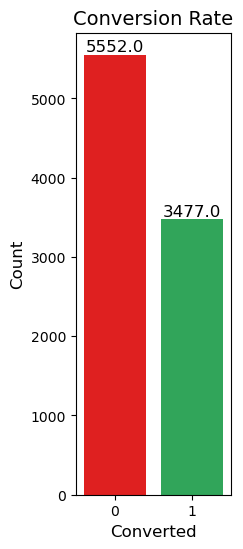

In [51]:
# Define color palette
custom = {0: '#FF0000', 1: '#1DB954'}
# Plot the conversion rate
plt.figure(figsize=(2,6))
ax = sns.countplot(x="Converted", data=df_leads, palette=custom)
plt.title('Conversion Rate', fontsize=14)
plt.xlabel("Converted", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Annotate the plot with counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

From the above graph, there has been a overall conversion rate of around 39%



##### Now let's visualize Distribution of Categorical Features Colored by Conversion Status

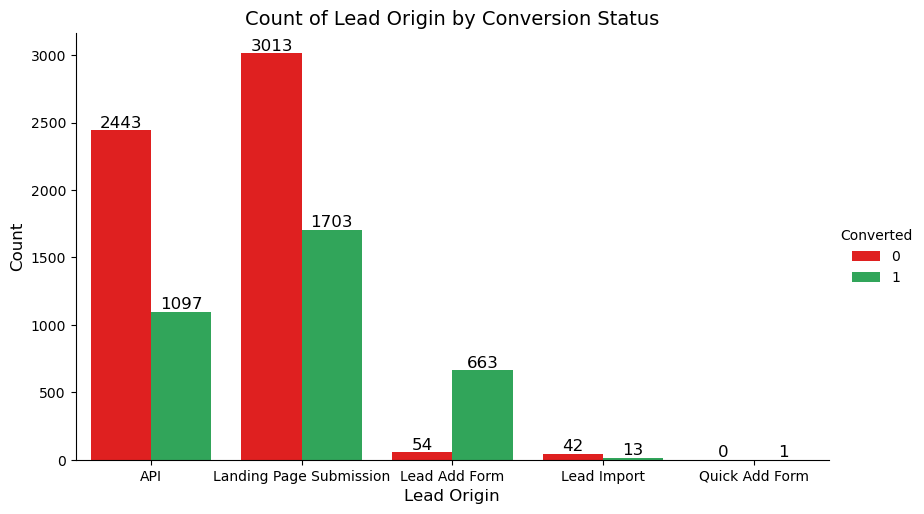

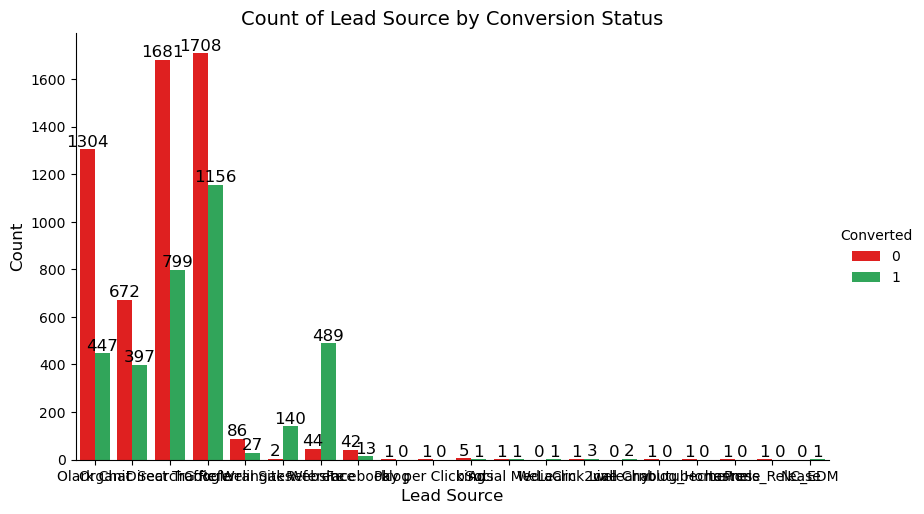

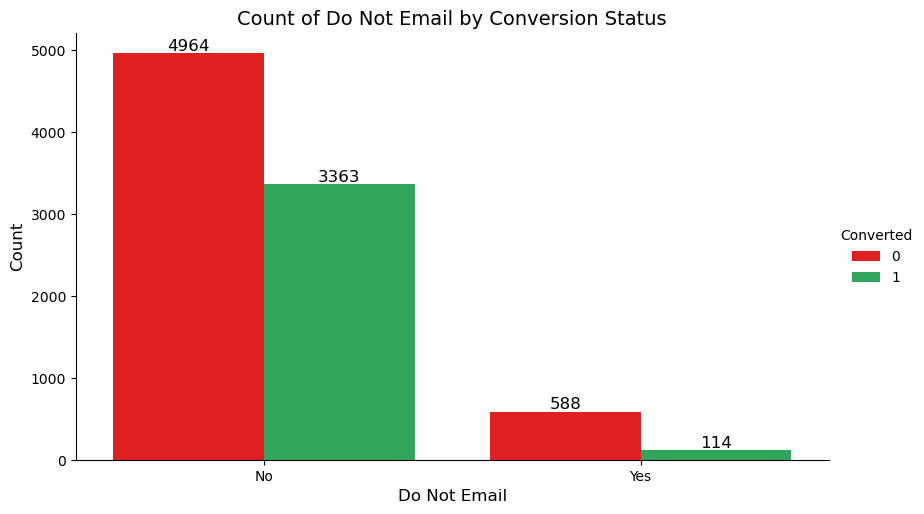

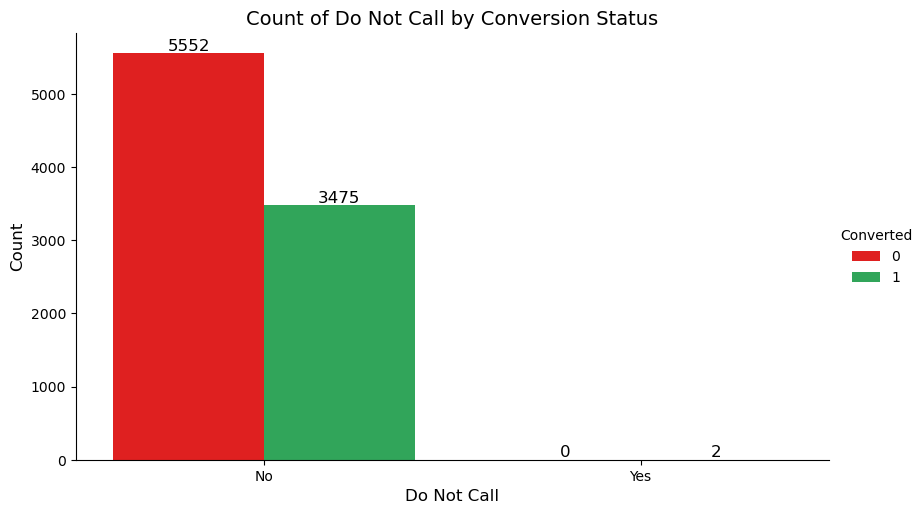

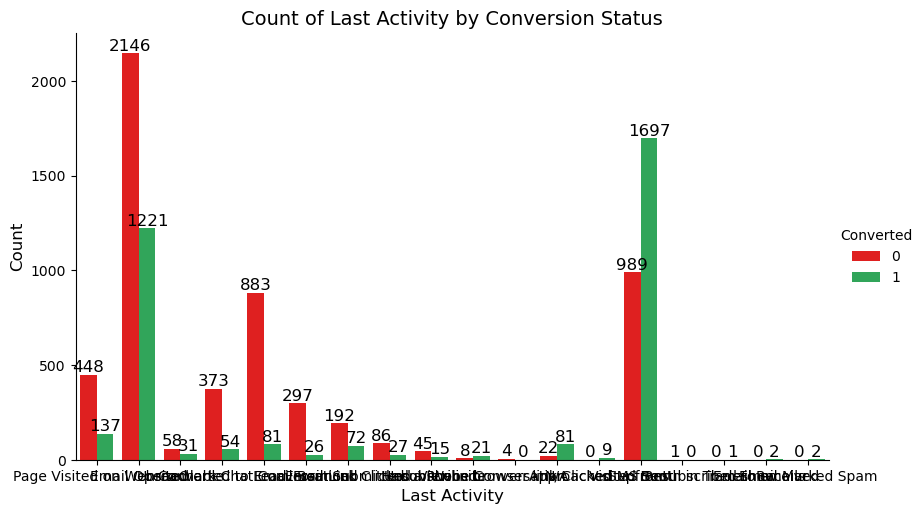

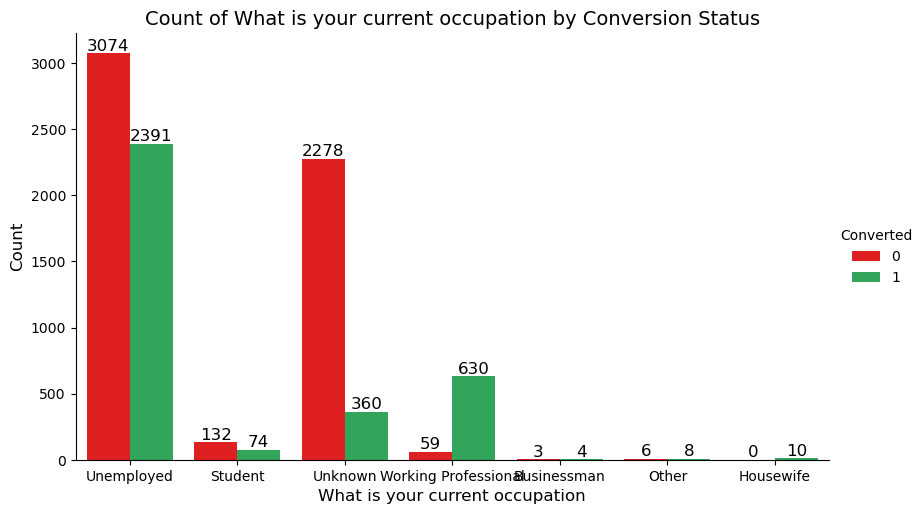

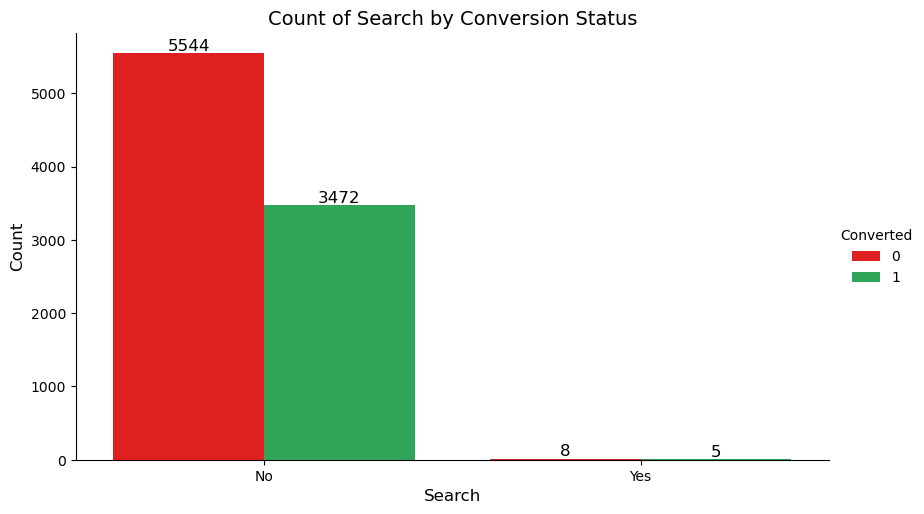

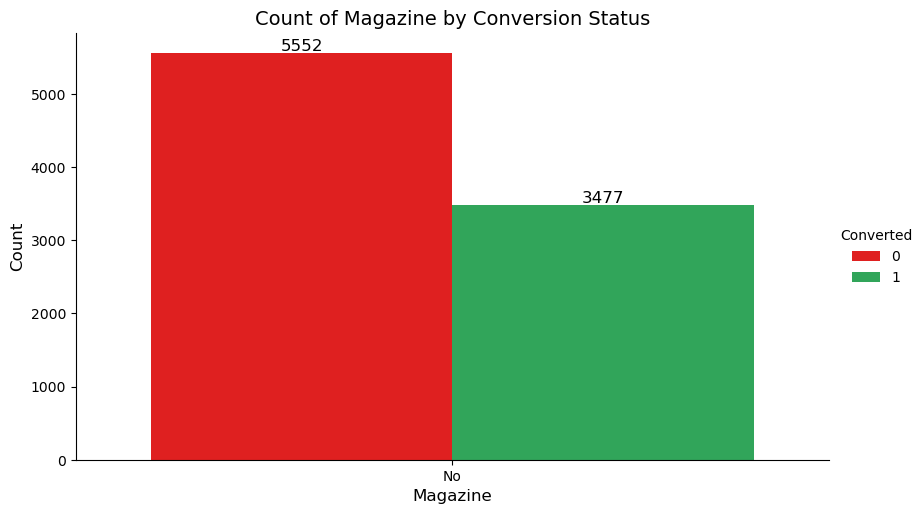

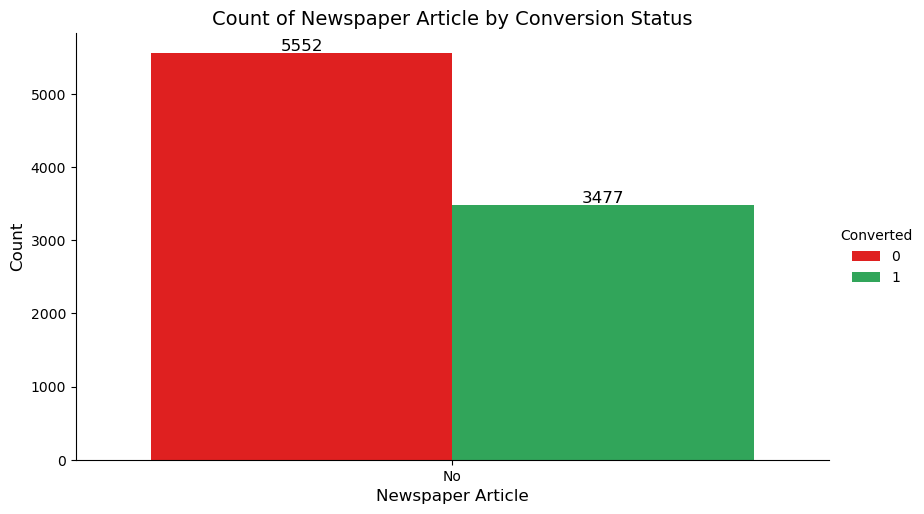

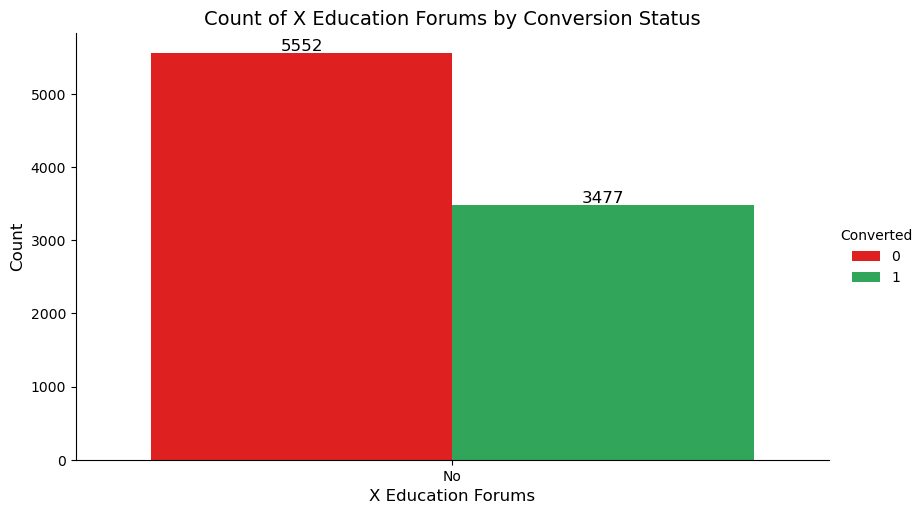

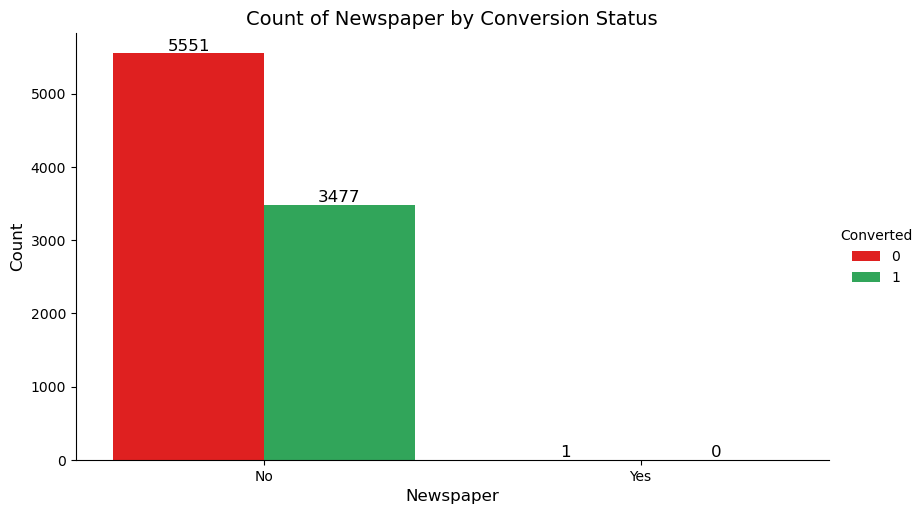

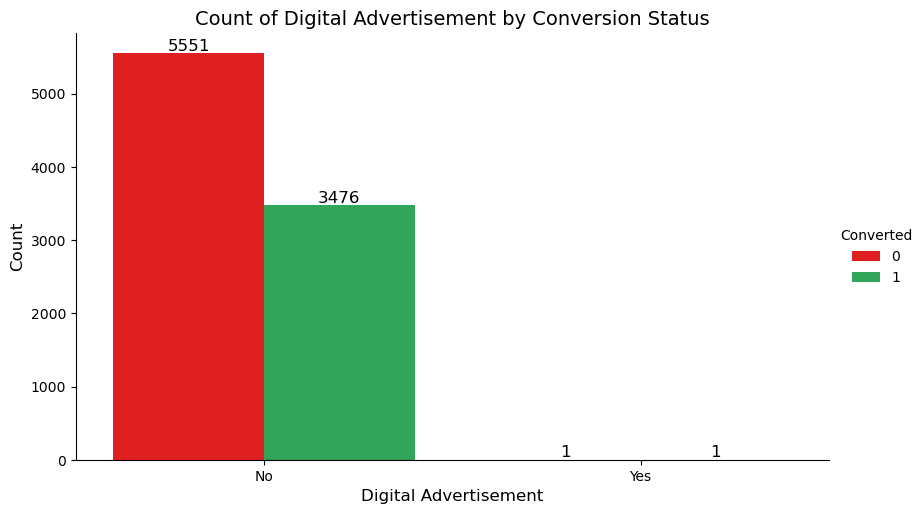

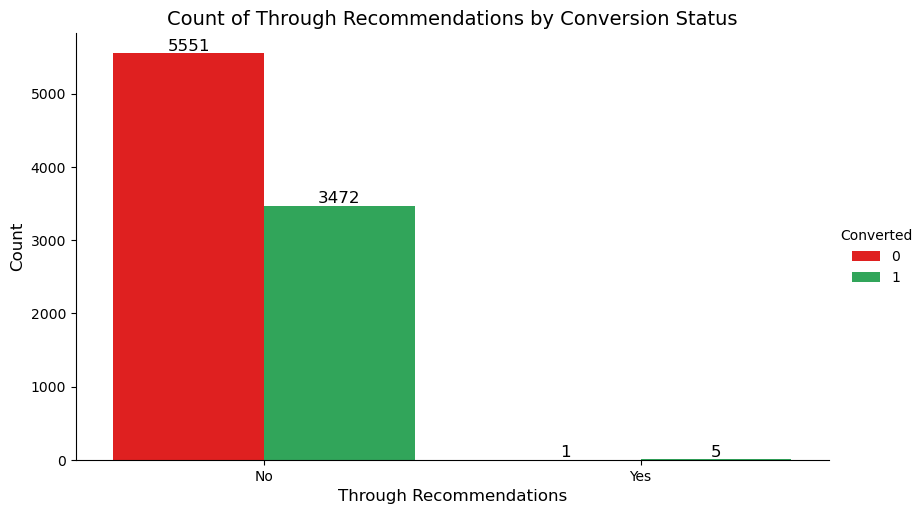

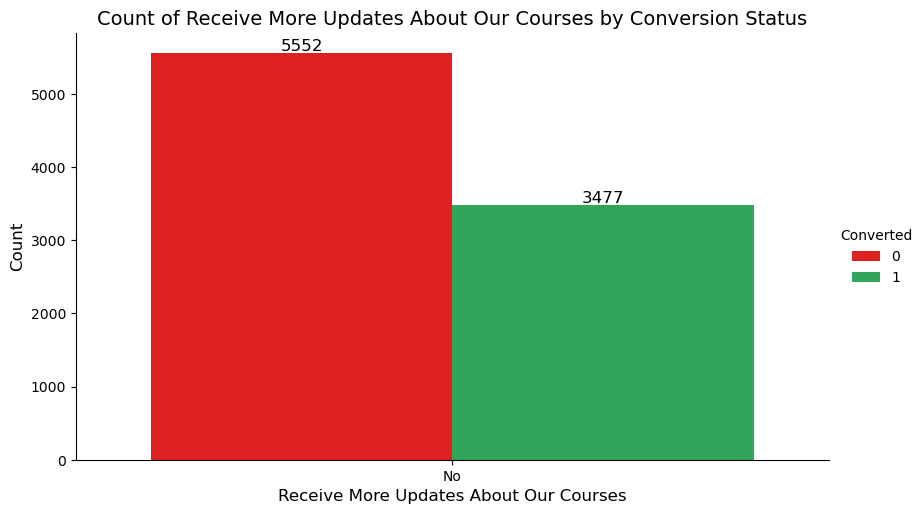

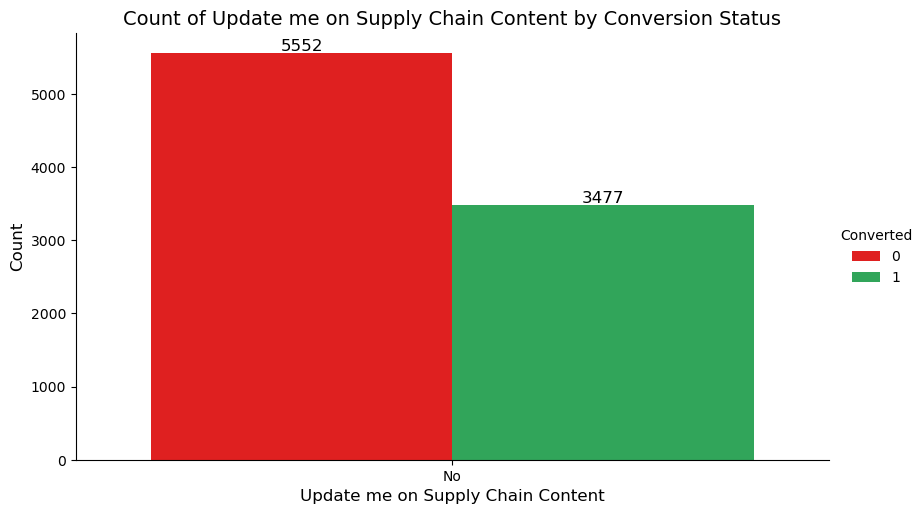

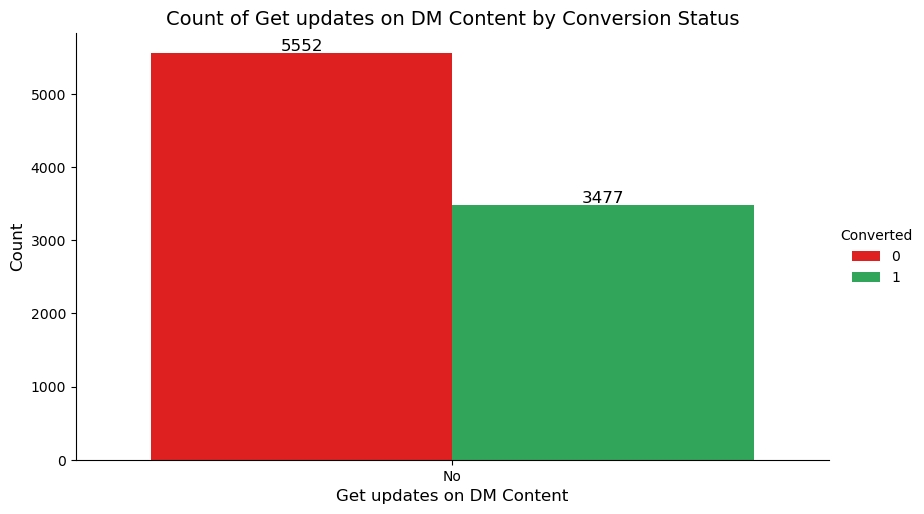

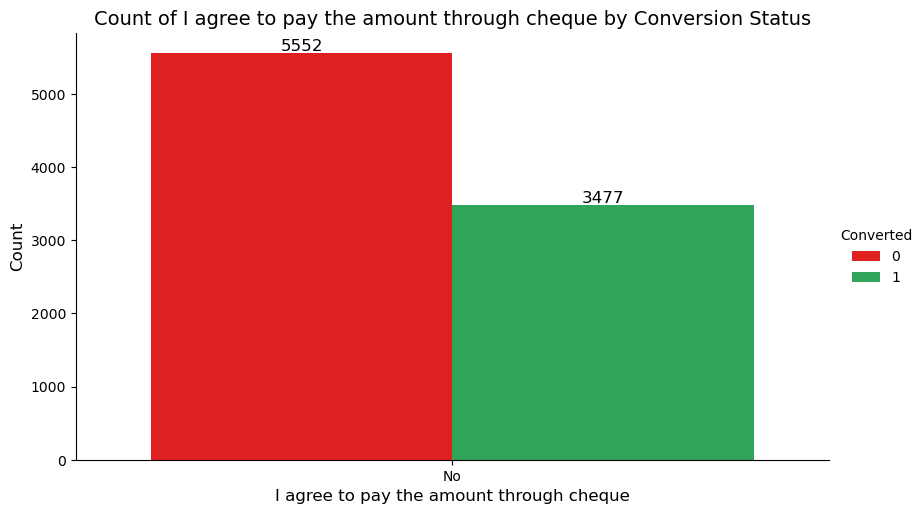

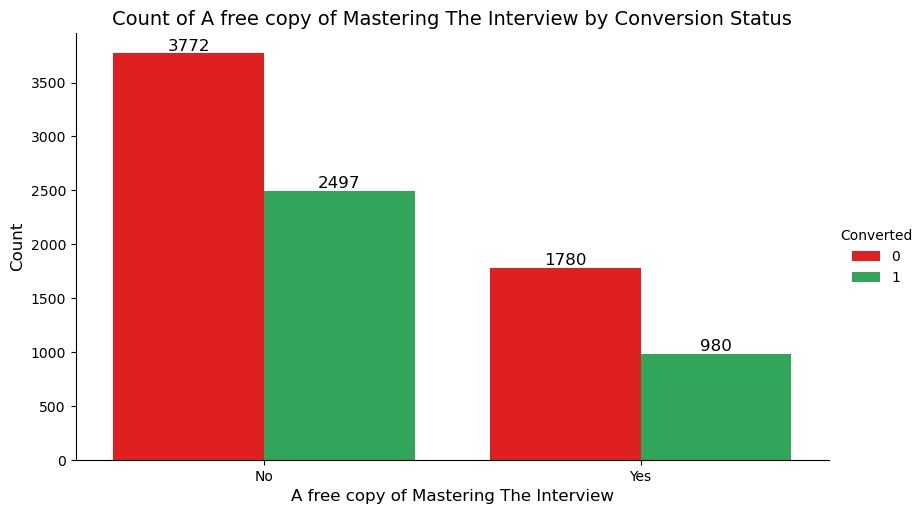

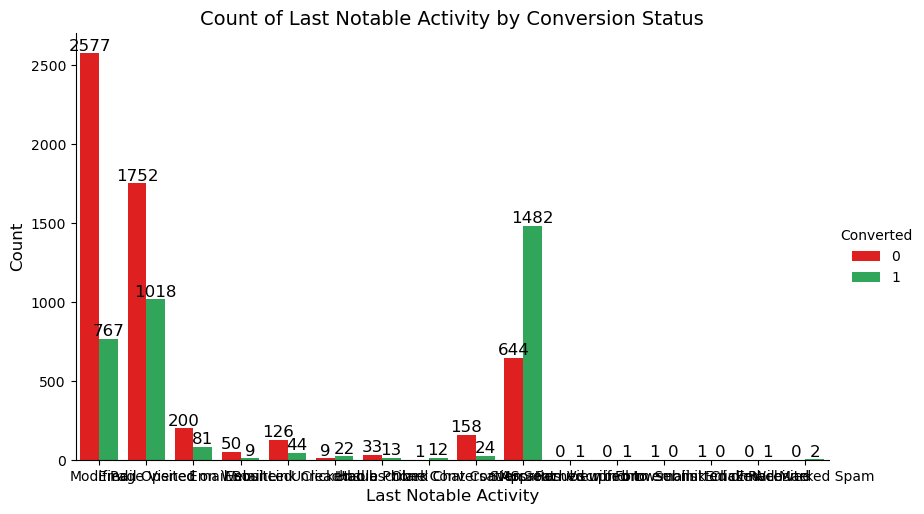

In [52]:
# Define your categorical features list, excluding 'Prospect ID'
categorical_features = df_leads.select_dtypes(include="object").columns.drop('Prospect ID')

# Define your custom color palette
custom_palette = {0: '#FF0000', 1: '#1DB954'}

# Iterate through each feature and create a catplot
for feature in categorical_features:
    plot = sns.catplot(x=feature, hue="Converted", kind="count", data=df_leads, palette=custom_palette, aspect=1.7)
    
    # Set the title and labels
    plt.title(f'Count of {feature} by Conversion Status', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Get the axis for adding text
    ax = plot.facet_axis(0, 0)
    
    # Print the counts on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), fontsize=12, color='black', ha='center', va='bottom')
    
    plt.show()

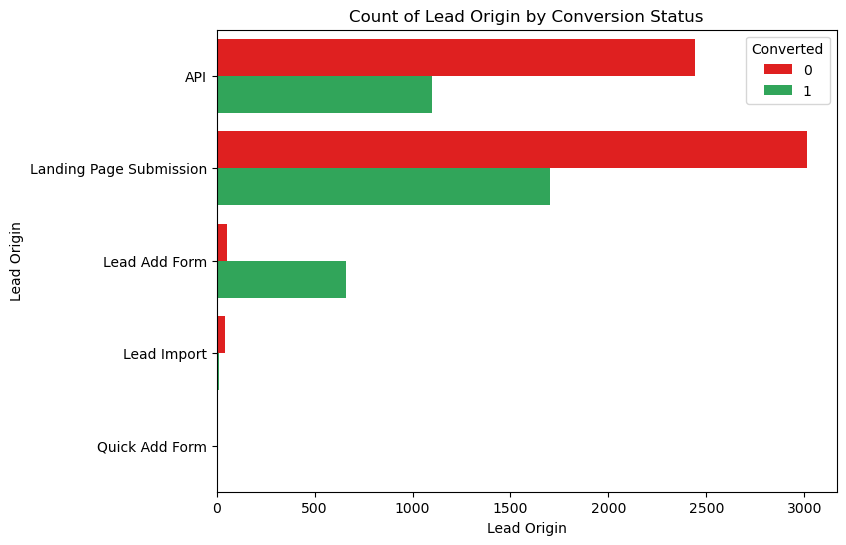

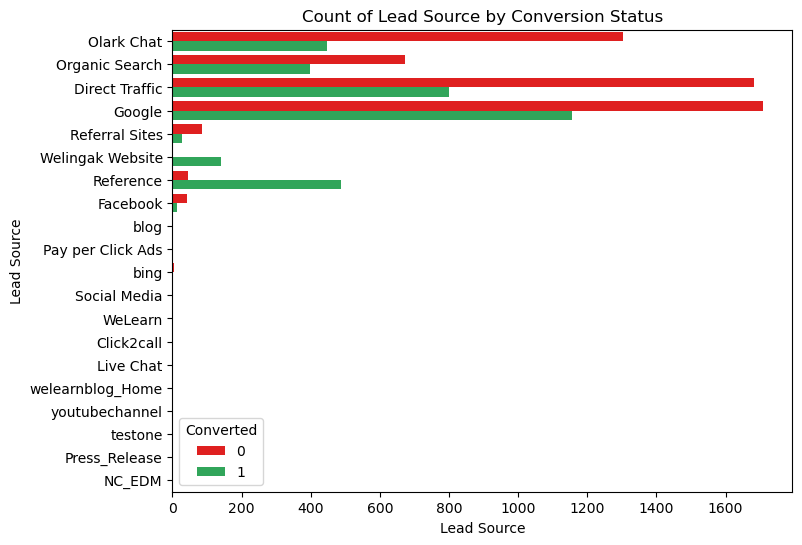

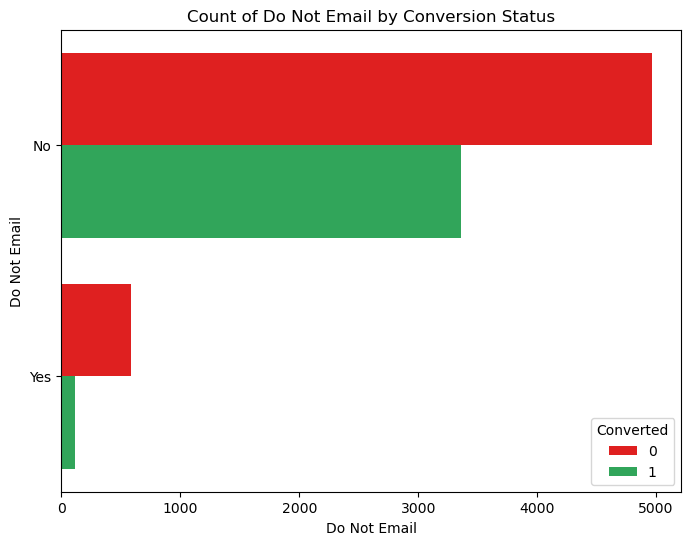

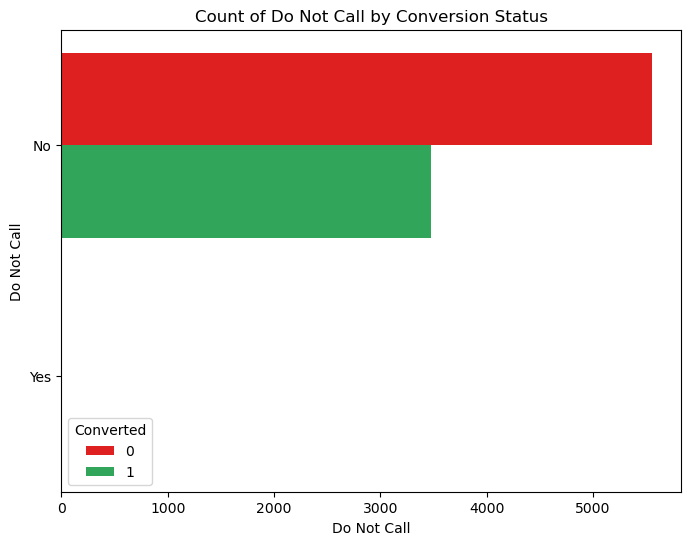

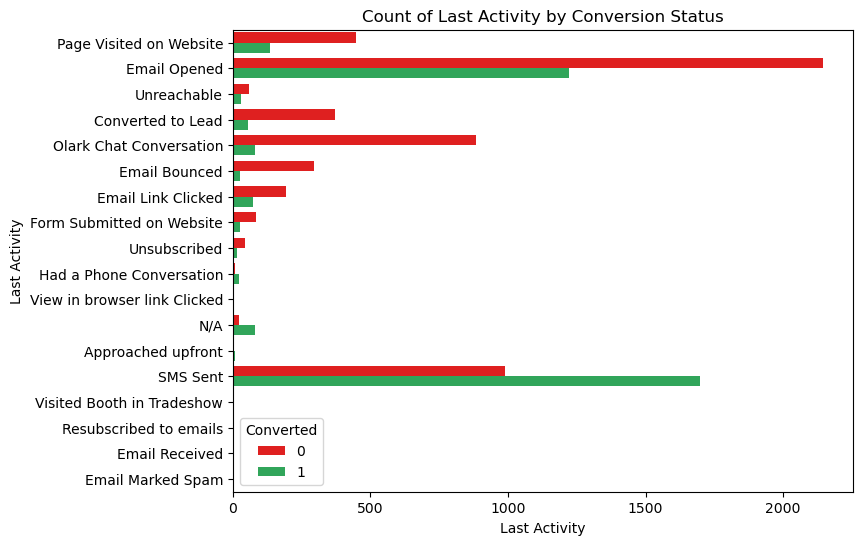

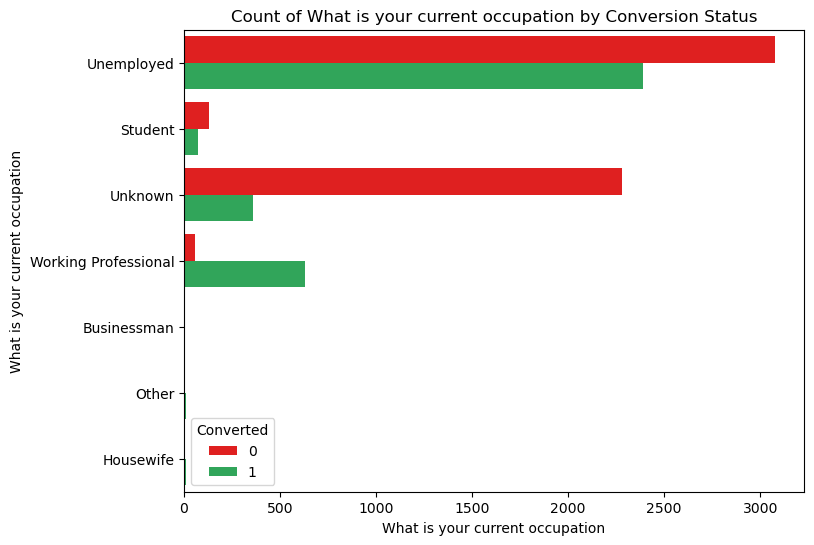

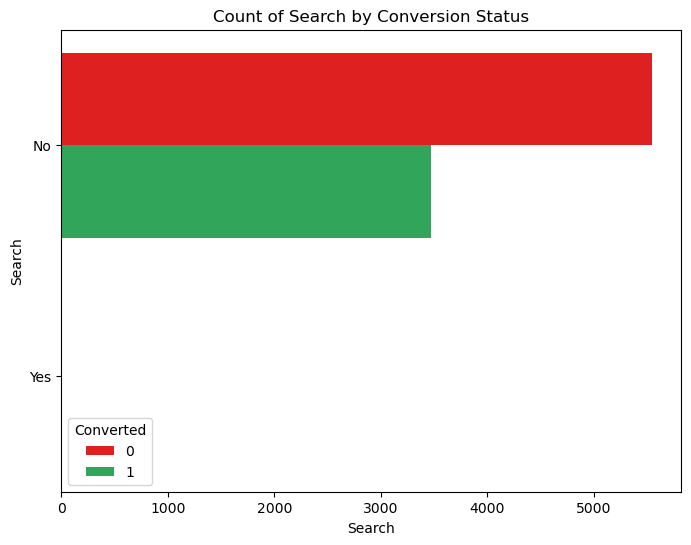

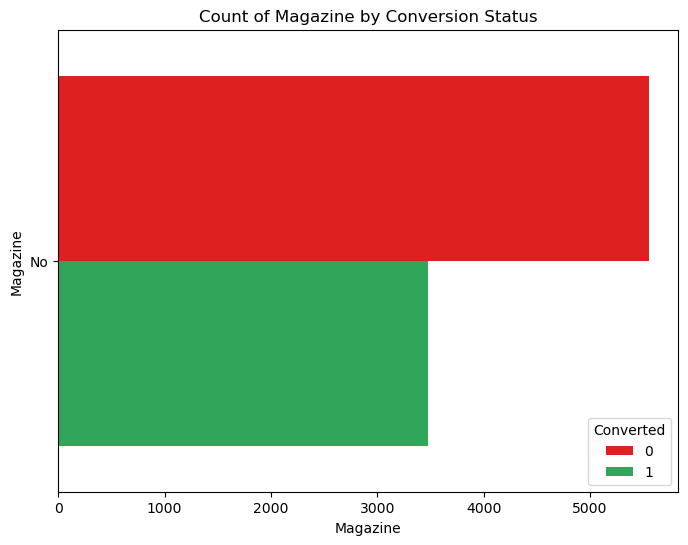

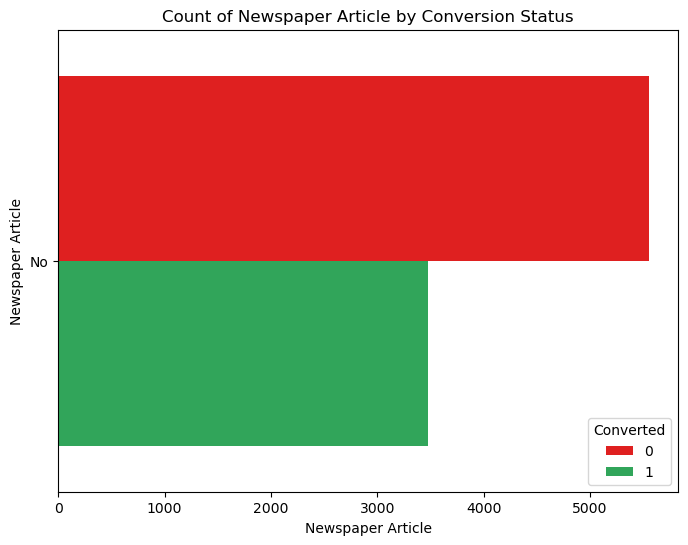

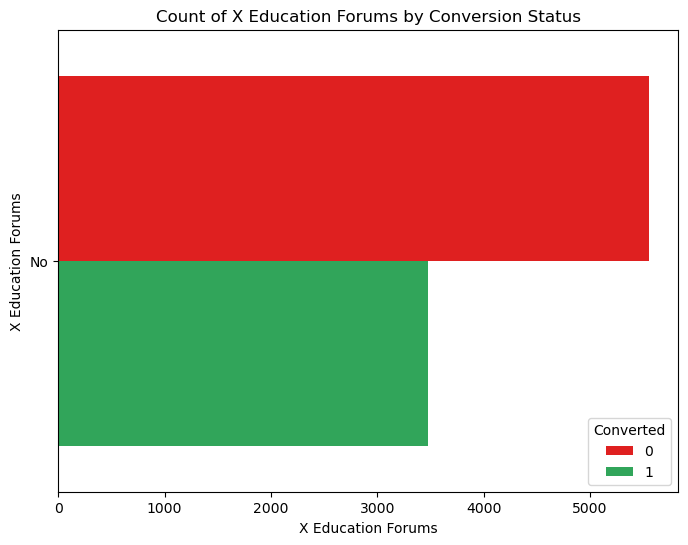

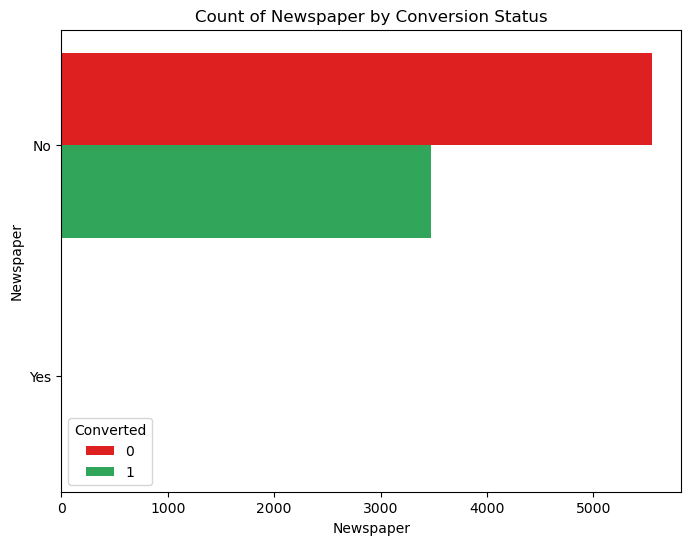

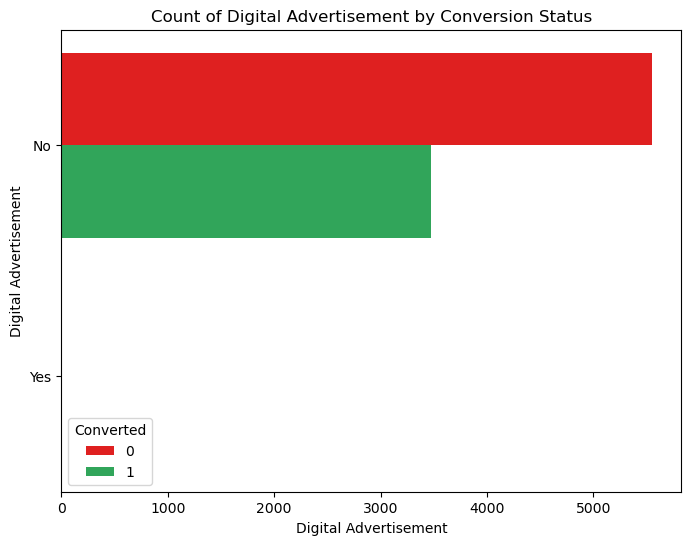

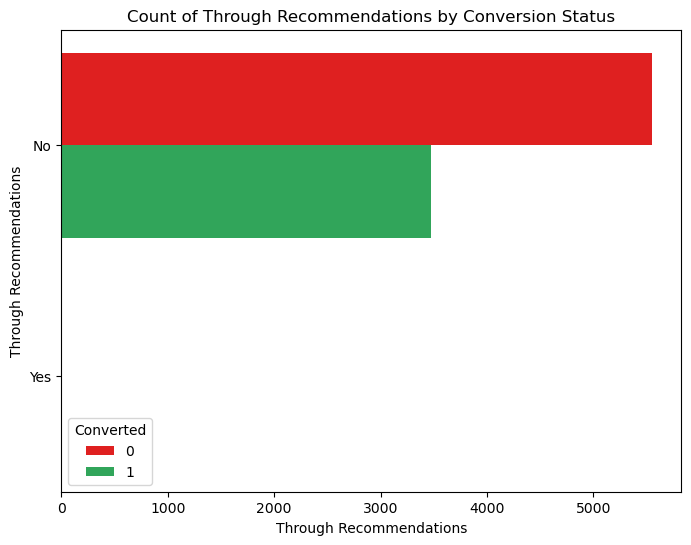

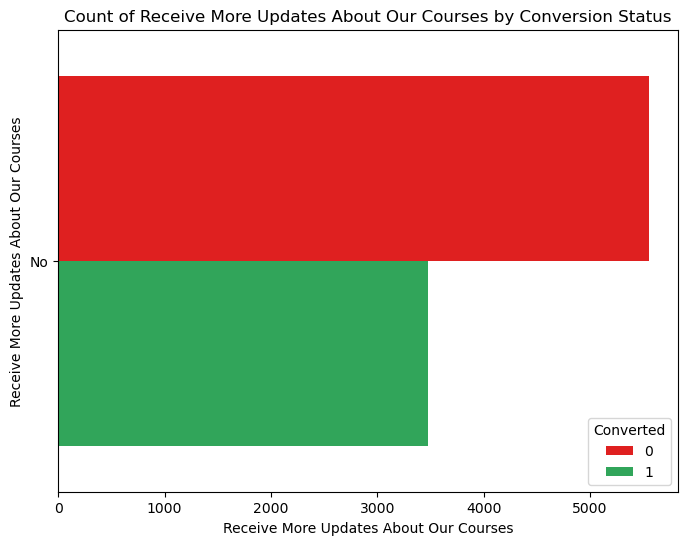

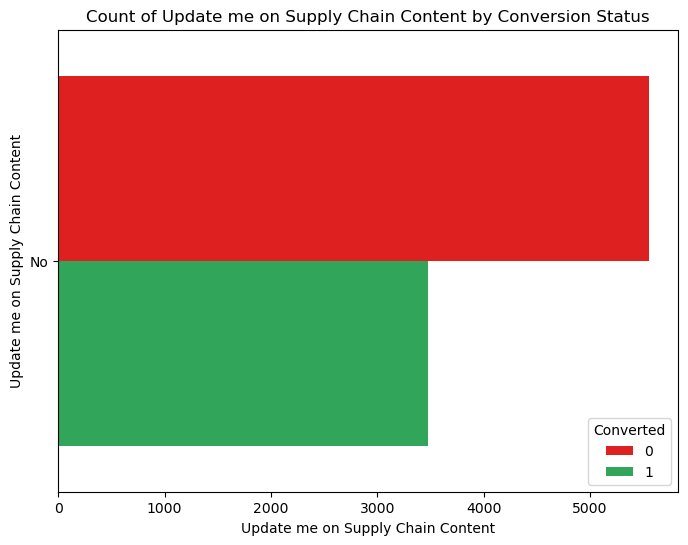

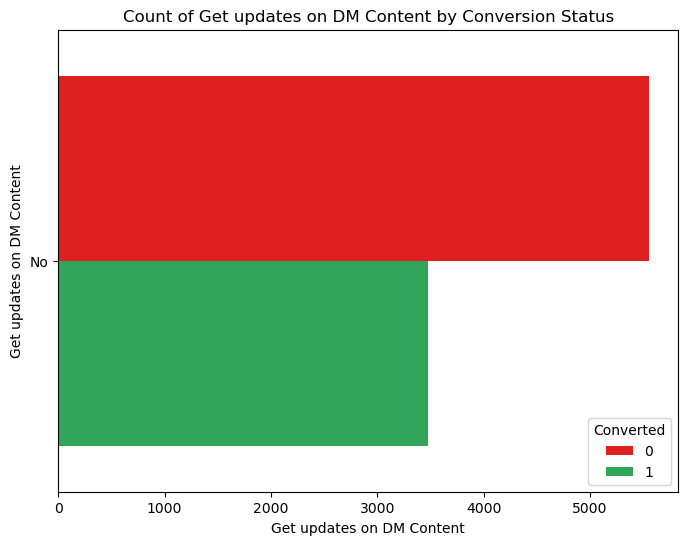

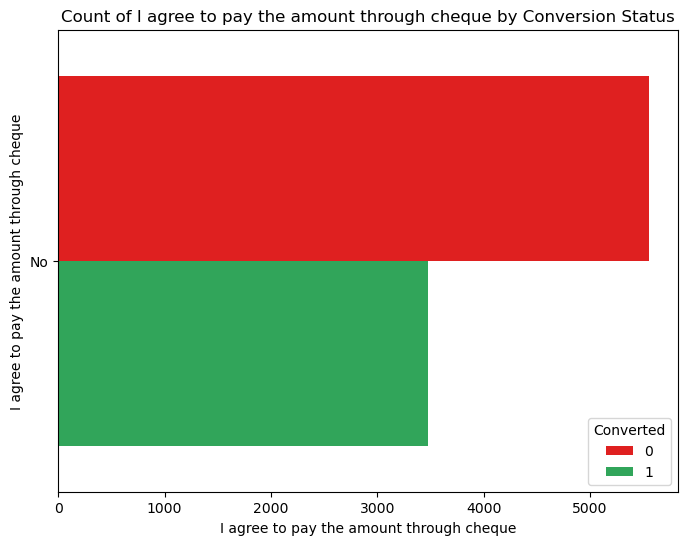

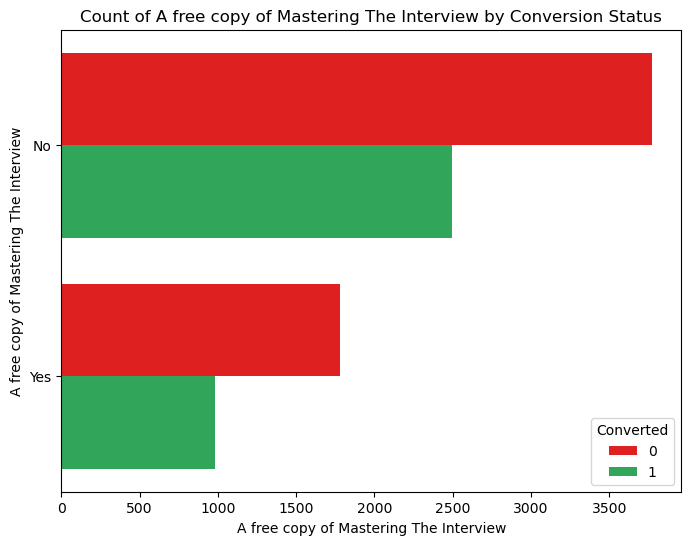

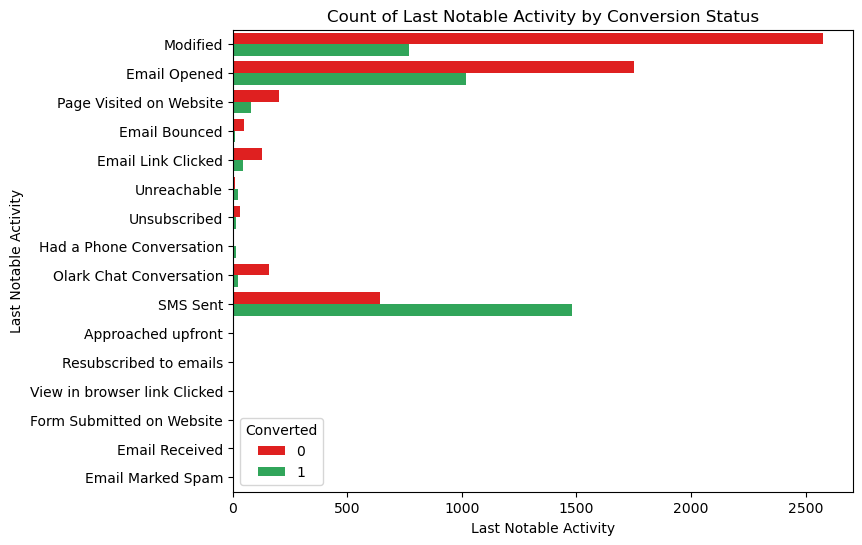

In [52]:
categorical_features = (df_leads.select_dtypes(include ="object").columns).drop('Prospect ID')
for i in categorical_features:
    plt.figure(figsize =(8,6))
    axx=sns.countplot(y=df_leads[i],hue=df_leads.Converted,palette=custom)
    plt.title(f'Count of {i} by Conversion Status')
    plt.xlabel(i)
    plt.show() 

Many columns, including  Magazine, Newspaper Article, X Education Forums, Newspaper,  Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, and I agree to pay the amount through cheque, mostly contain the value 'No'. Since these columns don't add much variety to our data, we'll remove them from the dataset.

In [53]:
df_leads.drop(['Magazine','Newspaper Article','X Education Forums', 'Newspaper', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

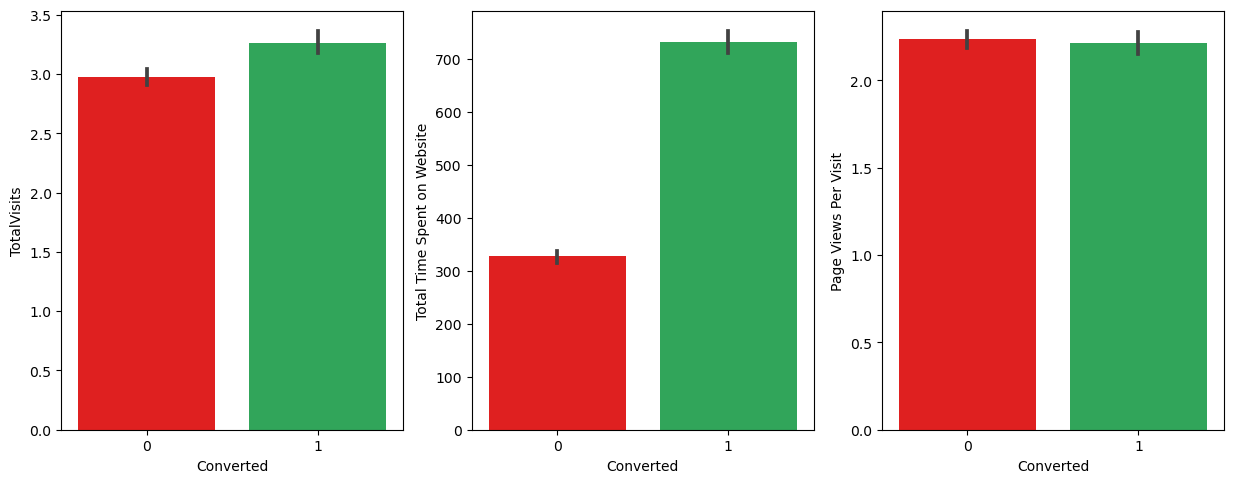

In [54]:
# Checking The Distribution Of Numeric Features Across Conversion Status

plt.figure(figsize=(15,25))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette=custom, data = df_leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette=custom, data = df_leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette=custom, data = df_leads)
plt.show()

The conversion rates were notably higher for Total Visits, Total Time Spent on Website, and Page Views Per Visit(almost similar to non conversions)

###### Relationships Between Numerical Features Colored By Conversion Status

Visualizing relationships between TotalVisits, Total Time Spent on Website, and Page Views Per Visit as user_engagement, colored by conversion status

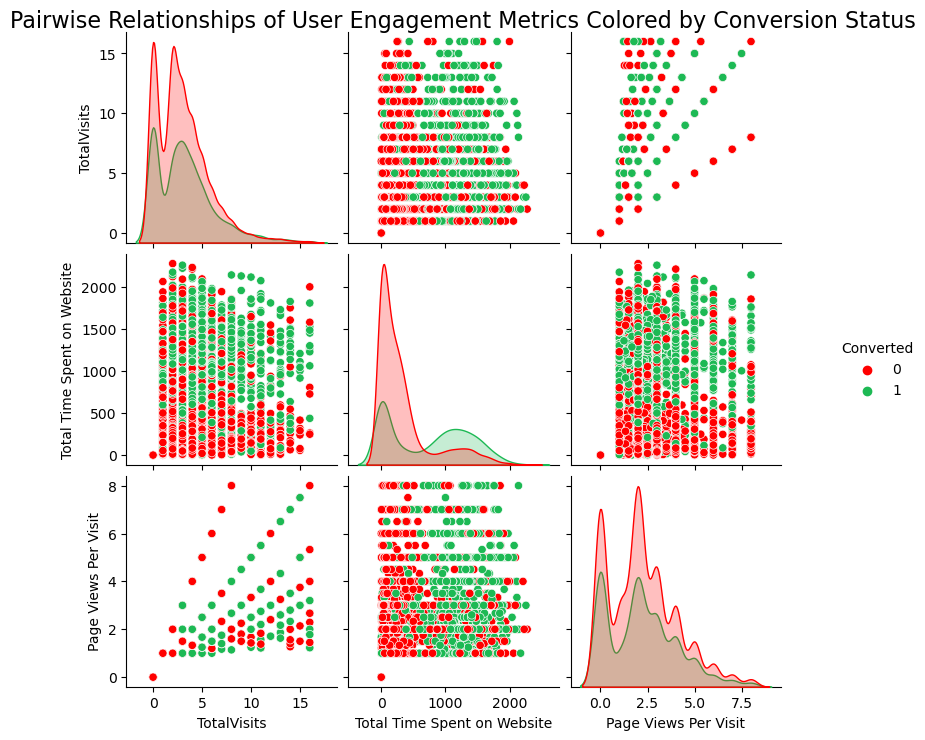

In [55]:
user_engagement = df_leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
pair_plot = sns.pairplot(user_engagement, diag_kind='kde', hue='Converted', palette=custom)

# Set the title for the entire plot
pair_plot.fig.suptitle('Pairwise Relationships of User Engagement Metrics Colored by Conversion Status', size=16)

# Adjust the layout to make room for the title
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()

Applying PowerTransformer to normalize the user_engagement data for improved analysis. This transformation helps in stabilizing variance and making the data more normally distributed. 

The pair plot shows the relationship between website visits, time spent, and page views. Most users, regardless of whether they converted or not, visited the website a few times and spent similar amounts of time. However, higher page views and more time spent slightly correlate with a higher likelihood of conversion.

In [56]:
#Extracting Only Nyumeric Features
numeric_features=df_leads.select_dtypes(include=[np.number])
numeric_features

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0.0,0,0.00
1,660728,0,5.0,674,2.50
2,660727,1,2.0,1532,2.00
3,660719,0,1.0,305,1.00
4,660681,1,2.0,1428,1.00
...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67
9236,579546,0,2.0,238,2.00
9237,579545,0,2.0,199,2.00
9238,579538,1,3.0,499,3.00


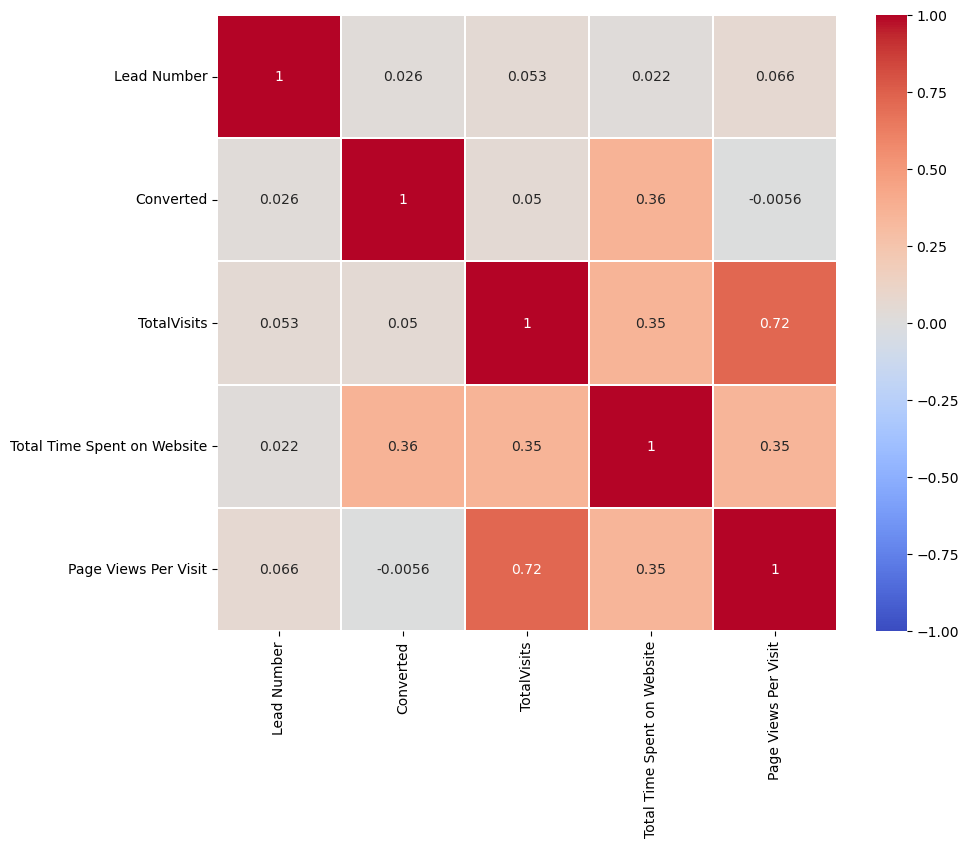

In [57]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap with changed color scheme
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", robust=True, linewidth=0.1, vmin=-1)
plt.show()


Looks like there are features with high correlation them.

### Creating Dummy Variables


In [58]:
categorical_columns = df_leads.select_dtypes(include='object').columns
categorical_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'What is your current occupation',
       'Search', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
# Demo Cell
demo = pd.DataFrame({'A': ['a', 'b', 'c','d']})
demo

,A
0,a
1,b
2,c
3,d


In [60]:
pd.get_dummies(demo, dtype=int)

,A_a,A_b,A_c,A_d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [61]:
pd.get_dummies(demo, prefix=['col1'], dtype=int)

,col1_a,col1_b,col1_c,col1_d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [62]:
# Creating dummy variables using the 'get_dummies' command
categorical_dummy = pd.get_dummies(df_leads[['Do Not Email','Do Not Call','Lead Origin', 'Lead Source', 'Last Activity','Digital Advertisement','Through Recommendations', 'A free copy of Mastering The Interview','Search','What is your current occupation','Last Notable Activity']], dtype=int)

# Add the results to the master dataframe
df_leads = pd.concat([df_leads, categorical_dummy], axis=1)

In [63]:
# Dropping the variables for which the dummy variables have been created

df_leads = df_leads.drop(['Do Not Email','Do Not Call','Lead Origin', 'Lead Source', 'Last Activity','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Search','What is your current occupation','Last Notable Activity'], axis=1)

In [64]:
# Dropping Prospect ID and Lead Number as they do not help in the analysis 
df_leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [65]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9029 non-null   int64  
 1   TotalVisits                                           9029 non-null   float64
 2   Total Time Spent on Website                           9029 non-null   int64  
 3   Page Views Per Visit                                  9029 non-null   float64
 4   Do Not Email_No                                       9029 non-null   int32  
 5   Do Not Email_Yes                                      9029 non-null   int32  
 6   Do Not Call_No                                        9029 non-null   int32  
 7   Do Not Call_Yes                                       9029 non-null   int32  
 8   Lead Origin_API                                       9029 non-

In [66]:
# Checking The Percentage Of null Values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Do Not Email_No                                       0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 82, dtype: float64

In [67]:
# Shape Of the Dataframe
df_leads.shape

(9029, 82)

### Test-Train Split

In [68]:
# Put all the feature variables in X
X = df_leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
# Assigning Response variable to y
y = df_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [71]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6320, 81)
y_train Size (6320,)


### Scaling The Numeric Features With MinMax Scaling

In [72]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3894,0.1250,0.019806,0.250,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1925,0.3125,0.381162,0.625,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6175,0.2500,0.828345,0.500,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9094,0.1250,0.334067,0.125,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
450,0.1875,0.081426,0.375,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
### Checking the Conversion Rate percentage

converted = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
converted

38.50924797873519

###### We have almost 39% of conversion rate

## MODEL BUILDING

##### Running Initial Training Model

In [74]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 20 Aug 2024   Deviance:                   1.8135e+05
Time:                        21:01:16   Pearson chi2:                 8.87e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.748e+26    3.3e+19   1.13e+07      0.000    3.75e+26    3.75e+26
TotalVisits                                           3.661e+14   7.67e+06   4.77e+07      0.000    3.66e+14    3.66e+14
Total Time Spent on Website                           2.331e+15   4.04e+06   5.77e+08      0.000    2.33e+15    2.33e+15
Page Views Per Visit                                  -1.64e+14   6.53e+06  -2.51e+07      0.000   -1.64e+14   -1.64e+14
Do Not Email_No                                       1.829e+26   1.61e+19   1.13e+07      0.000    1.83e+26    1.83e+26
Do Not Email_Yes                                      1.829e+26   1.61e+19   1.13e+07      0.000    1.83e+26    1.83e+26
Do Not Call_No                                         1.93e+26    1.7e+19   1.13e+07      0.000    1.93e+26    1.93e+26
Do Not Call_Yes                                        1.93e+26    1.7e+19   1.13e+07      0.000    1.93e+26    1.93e+26
Lead Origin_API                                       7.376e+25    6.5e+18   1.13e+07      0.000    7.38e+25    7.38e+25
Lead Origin_Landing Page Submission                   7.376e+25    6.5e+18   1.13e+07      0.000    7.38e+25    7.38e+25
Lead Origin_Lead Add Form                             7.376e+25    6.5e+18   1.13e+07      0.000    7.38e+25    7.38e+25
Lead Origin_Lead Import                               7.376e+25    6.5e+18   1.13e+07      0.000    7.38e+25    7.38e+25
Lead Origin_Quick Add Form                            7.376e+25    6.5e+18   1.13e+07      0.000    7.38e+25    7.38e+25
Lead Source_Click2call                                1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Direct Traffic                            1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Facebook                                  1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Google                                    1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Live Chat                                 1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_NC_EDM                                    1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Olark Chat                                1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Organic Search                            1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Pay per Click Ads                         1.127e+25   9.93e+17   1.13e+07      0.000    1.13e+25    1.13e+25
Lead Source_Press_Release                            -4.91

### Feature Selection Using RFE

In [75]:
#Import LogisticRegression Class and create an instance of the model.
logreg = LogisticRegression()

In [76]:
# Import RFE and use it to select the top 15 features
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True,  True,  True, False,  True, False,  True, False, False])

In [78]:
# Examining the features selected by RFE along with their support status and ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Do Not Email_No', False, 13),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_No', False, 18),
 ('Do Not Call_Yes', False, 24),
 ('Lead Origin_API', False, 9),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Origin_Quick Add Form', False, 45),
 ('Lead Source_Click2call', False, 12),
 ('Lead Source_Direct Traffic', False, 31),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 52),
 ('Lead Source_NC_EDM', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', Fa

In [79]:
# Store the names of the features selected by RFE into the variable selected_features
selected_features=col = X_train.columns[rfe.support_]
selected_features

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email_Yes', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Approached upfront', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## Rebuilding Model - Model 2

In [80]:
# Update X_train to include only the columns selected by RFE
X_train = X_train[selected_features]

In [81]:
X_train = X_train.fillna(0) 
y_train = y_train.fillna(0) 

In [82]:
print(X_train.dtypes)
print(y_train.dtypes)

TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Do Not Email_Yes                                          int32
Lead Origin_Lead Add Form                                 int32
Lead Source_Olark Chat                                    int32
Lead Source_Welingak Website                              int32
Last Activity_Approached upfront                          int32
Last Activity_Email Opened                                int32
Last Activity_Had a Phone Conversation                    int32
Last Activity_SMS Sent                                    int32
What is your current occupation_Housewife                 int32
What is your current occupation_Unknown                   int32
What is your current occupation_Working Professional      int32
Last Notable Activity_Email Opened                        int32
Last Notable Activity_Had a Phone Conver

In [83]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Approached upfront,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable
3894,0.1250,0.019806,0.250,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1925,0.3125,0.381162,0.625,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6175,0.2500,0.828345,0.500,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9094,0.1250,0.334067,0.125,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
450,0.1875,0.081426,0.375,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [84]:
X_train_with_const = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_with_const, family=sm.families.Binomial()).fit()
print(logm2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.7
Date:                Tue, 20 Aug 2024   Deviance:                       5003.3
Time:                        21:01:29   Pearson chi2:                 6.32e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4179
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Email Opened,7.58
8,Last Activity_Email Opened,7.11
2,Page Views Per Visit,6.21
0,TotalVisits,4.73
16,Last Notable Activity_Modified,2.38
1,Total Time Spent on Website,2.16
10,Last Activity_SMS Sent,2.04
9,Last Activity_Had a Phone Conversation,2.03
15,Last Notable Activity_Had a Phone Conversation,2.02
5,Lead Source_Olark Chat,1.81


Let's drop 'Last Notable Activity_Resubscribed to emails' as it has p>0.05

In [86]:
X_train.drop('Last Notable Activity_Resubscribed to emails', axis = 1, inplace = True)

### Rebuilding model - Model 3 

In [87]:
# Refit the model with the updated set of features
logm3 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.9
Date:                Tue, 20 Aug 2024   Deviance:                       5007.8
Time:                        21:01:29   Pearson chi2:                 6.32e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4175
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Email Opened,7.58
8,Last Activity_Email Opened,7.11
2,Page Views Per Visit,6.21
0,TotalVisits,4.73
16,Last Notable Activity_Modified,2.38
1,Total Time Spent on Website,2.16
10,Last Activity_SMS Sent,2.04
9,Last Activity_Had a Phone Conversation,2.03
15,Last Notable Activity_Had a Phone Conversation,2.02
5,Lead Source_Olark Chat,1.81


Let's drop 'What is your current occupation_Housewife' as it has p > 0.05

In [89]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Rebuilding The model - Model 4

In [90]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.5
Date:                Tue, 20 Aug 2024   Deviance:                       5015.0
Time:                        21:01:30   Pearson chi2:                 6.33e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4168
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.58
8,Last Activity_Email Opened,7.11
2,Page Views Per Visit,6.21
0,TotalVisits,4.73
15,Last Notable Activity_Modified,2.38
1,Total Time Spent on Website,2.16
10,Last Activity_SMS Sent,2.04
9,Last Activity_Had a Phone Conversation,2.03
14,Last Notable Activity_Had a Phone Conversation,2.02
5,Lead Source_Olark Chat,1.81


We drop 'Last Notable Activity_Had a Phone Conversation' as it has p>0.05

In [92]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Rebuilding The model - Model 5

In [93]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.4
Date:                Tue, 20 Aug 2024   Deviance:                       5020.8
Time:                        21:01:30   Pearson chi2:                 7.08e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4163
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.57
8,Last Activity_Email Opened,7.11
2,Page Views Per Visit,6.21
0,TotalVisits,4.73
14,Last Notable Activity_Modified,2.37
1,Total Time Spent on Website,2.16
10,Last Activity_SMS Sent,2.04
5,Lead Source_Olark Chat,1.81
4,Lead Origin_Lead Add Form,1.61
11,What is your current occupation_Unknown,1.58


We drop 'Last Activity_Approached upfront' as it has p>0.05

In [95]:
X_train.drop('Last Activity_Approached upfront', axis = 1, inplace = True)

### Rebuilding The Model - Model 6

In [96]:
# Refit the model with the updated set of features
logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
# Display the summary of the fitted model
print(logm6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2515.2
Date:                Tue, 20 Aug 2024   Deviance:                       5030.3
Time:                        21:01:31   Pearson chi2:                 7.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4154
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All the p values are within the normal range

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,7.57
7,Last Activity_Email Opened,7.10
2,Page Views Per Visit,6.20
0,TotalVisits,4.73
13,Last Notable Activity_Modified,2.37
1,Total Time Spent on Website,2.15
9,Last Activity_SMS Sent,2.04
5,Lead Source_Olark Chat,1.80
4,Lead Origin_Lead Add Form,1.60
10,What is your current occupation_Unknown,1.58


We drop 'Last Notable Activity_Email Opened ' as it has highest VIF value

In [98]:
X_train.drop('Last Notable Activity_Email Opened', axis = 1, inplace = True)

### Rebuilding The Model - Model 7

In [99]:
logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
print(logm7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.8
Date:                Tue, 20 Aug 2024   Deviance:                       5053.6
Time:                        21:01:31   Pearson chi2:                 7.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.07
0,TotalVisits,4.72
7,Last Activity_Email Opened,2.21
1,Total Time Spent on Website,2.14
9,Last Activity_SMS Sent,1.98
12,Last Notable Activity_Modified,1.76
5,Lead Source_Olark Chat,1.72
4,Lead Origin_Lead Add Form,1.57
10,What is your current occupation_Unknown,1.56
6,Lead Source_Welingak Website,1.25


The 'Page Views Per Visit' has the highest VIF indicating that there is a severe multicollinearity. So we Try dropping it

In [101]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

### Rebuilding The Model - Model 8

In [102]:
logm8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.8
Date:                Tue, 20 Aug 2024   Deviance:                       5069.5
Time:                        21:01:32   Pearson chi2:                 7.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4117
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.64
1,Total Time Spent on Website,2.12
6,Last Activity_Email Opened,1.93
8,Last Activity_SMS Sent,1.74
11,Last Notable Activity_Modified,1.64
4,Lead Source_Olark Chat,1.59
9,What is your current occupation_Unknown,1.56
3,Lead Origin_Lead Add Form,1.52
5,Lead Source_Welingak Website,1.25
10,What is your current occupation_Working Profes...,1.20


Since the Model 8 seems to be stable with significant pvalues and VIF values, we shall go ahead with this model for further analysis

## Model Evaluation


In [104]:
# Add constant to X_train (for prediction)
X_train_sm = sm.add_constant(X_train)

# Now, use the fitted model to predict the probabilities
y_train_pred = res.predict(X_train_sm)

# Display the first 10 predictions
y_train_pred[:10]


3894    0.127893
1925    0.752555
6175    0.958521
9094    0.422386
450     0.064860
3890    0.148326
5754    0.350636
6732    0.342154
2810    0.095024
986     0.148326
dtype: float64

In [105]:
# Reshaping y_train_pred to a 1D array
y_train_pred = y_train_pred.values.reshape(-1)

# Display the first 10 values
y_train_pred[:10]

array([0.12789325, 0.75255498, 0.95852078, 0.42238556, 0.06486023,
       0.14832646, 0.3506363 , 0.34215376, 0.09502391, 0.14832646])

#### Comparing Actual Conversions with Predicted Probabilities

In [106]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.127893
1,1,0.752555
2,1,0.958521
3,1,0.422386
4,0,0.064860


In [107]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.127893,0
1,1,0.752555,1
2,1,0.958521,1
3,1,0.422386,0
4,0,0.064860,0


In [108]:
# Constructing the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3458  430]
 [ 721 1711]]


In [109]:
#Calculate and display the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8178797468354431


The accuracy rate of approximately 82% (81.6%) is promising. but it's important to look at more than just accuracy to fully understand the model's performance. We should also calculate metrics like precision, recall.  These will give us a better idea of how well the model is doing, especially if the classes in our data are imbalanced. 

#### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [110]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [111]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7035361842105263

In [112]:
# Calculating the 'specificity'

TN/(TN+FP)

0.88940329218107

In [113]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))


0.11059670781893004


In [114]:
# positive predictive value 

print (TP / float(TP+FP))

0.7991592713685194


In [115]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8274706867671692


### ROC Curve for Model Performance Evaluation

An ROC curve illustrates the tradeoff between sensitivity and specificity, where increasing sensitivity typically reduces specificity. A curve that closely follows the top-left border of the ROC space indicates higher accuracy, while a curve near the 45-degree diagonal suggests lower accuracy.

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

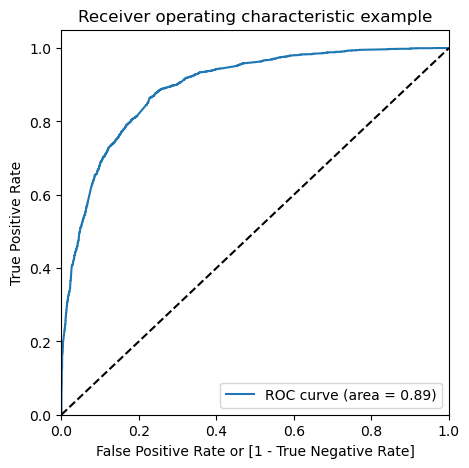

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Identifying the optimal cutoff value

With an AUC of 0.86, the model is performing well. The next step is to look at how sensitivity and specificity change at different thresholds so we can find the best cutoff point for making accurate predictions.

In [119]:
# Creating columns with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.127893,0,1,1,0,0,0,0,0,0,0,0
1,1,0.752555,1,1,1,1,1,1,1,1,1,0,0
2,1,0.958521,1,1,1,1,1,1,1,1,1,1,1
3,1,0.422386,0,1,1,1,1,1,0,0,0,0,0
4,0,0.064860,0,1,0,0,0,0,0,0,0,0,0


In [120]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_metrics_df = pd.DataFrame( columns = ['Probability Cutoff','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_metrics_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_metrics_df)

     Probability Cutoff  Accuracy  Sensitivity  Specificity
0.0                 0.0  0.384810     1.000000     0.000000
0.1                 0.1  0.639715     0.975740     0.429527
0.2                 0.2  0.763924     0.922286     0.664866
0.3                 0.3  0.803639     0.874178     0.759516
0.4                 0.4  0.816297     0.777138     0.840792
0.5                 0.5  0.817880     0.703536     0.889403
0.6                 0.6  0.809968     0.637336     0.917953
0.7                 0.7  0.785127     0.529194     0.945216
0.8                 0.8  0.761392     0.435444     0.965278
0.9                 0.9  0.718196     0.289062     0.986626


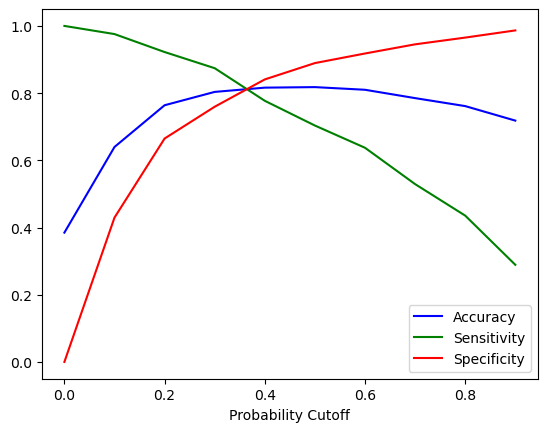

In [121]:
cutoff_metrics_df.plot.line(x='Probability Cutoff', y=['Accuracy','Sensitivity','Specificity'], color=['blue', 'green', 'red'])
plt.show()

It looks like threshold value of 0.39 approximately seems like the  best balance for all three metrics. But Let's look at the Precision - Recall Tradeoff aswell

### Evaluating the Precision-Recall Tradeoff

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6315    0
 6316    0
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    0
 6317    0
 6318    0
 6319    0
 Name: Predicted, Length: 6320, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

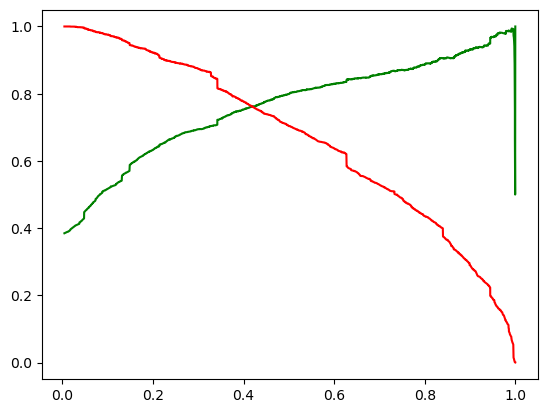

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:
# Set the desired recall value
desired_recall = 0.81

# Find the index of the closest recall to the desired recall
closest_idx = (np.abs(r - desired_recall)).argmin()

# Get the optimal threshold
optimal_threshold = thresholds[closest_idx]
optimal_threshold

0.35341721225908235

let's go with the threshold cutoff of 0.353

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.353 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.127893,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.752555,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.958521,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.422386,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.064860,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.127893,0,1,1,0,0,0,0,0,0,0,0,0,13
1,1,0.752555,1,1,1,1,1,1,1,1,1,0,0,1,75
2,1,0.958521,1,1,1,1,1,1,1,1,1,1,1,1,96
3,1,0.422386,0,1,1,1,1,1,0,0,0,0,0,1,42
4,0,0.064860,0,1,0,0,0,0,0,0,0,0,0,0,6
5,0,0.148326,0,1,1,0,0,0,0,0,0,0,0,0,15
6,0,0.350636,0,1,1,1,1,0,0,0,0,0,0,0,35
7,0,0.342154,0,1,1,1,1,0,0,0,0,0,0,0,34
8,0,0.095024,0,1,0,0,0,0,0,0,0,0,0,0,10
9,0,0.148326,0,1,1,0,0,0,0,0,0,0,0,0,15


In [128]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

final_predicted
1    1972
0     460
Name: count, dtype: int64

In [129]:
# check the precentage of final_predicted conversions

1972/float(1972+460)

0.8108552631578947

Therefore, the final model achieves a conversion rate of 81%, meeting the target set by X Education's CEO. This indicates that the model is performing well and aligns with the company's goals.

##### Comprehensive Model Evaluation: Accuracy, Confusion Matrix, Sensitivity, Specificity, and Predictive Values on Training Set.

In [130]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098101265822785

In [131]:
# Construncting A Confusion Matrix Again
final_confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
final_confusion_matrix

array([[3146,  742],
       [ 460, 1972]], dtype=int64)

In [132]:
TP = final_confusion_matrix[1,1] 
TN = final_confusion_matrix[0,0] 
FP = final_confusion_matrix[0,1] 
FN = final_confusion_matrix[1,0] 

In [133]:
# Calculating Sensitivity
TP/(TP+FN)

0.8108552631578947

In [134]:
# Calculating Specificity
TN/(TN+FP)

0.809156378600823

In [135]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.19084362139917696


In [136]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7266028002947679


In [137]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8724348308374931


The model shows solid performance with an accuracy of 81%, a sensitivity of 81.08%, and a specificity of 80.91%. These balanced percentages indicate the model is effectively identifying both positive and negative cases.

In [138]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7991592713685194

In [139]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7035361842105263

### Evaluating Model Performance on the Test Set

Making Predictions On The Test Dataset

In [140]:
# Scaling the test set 

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [141]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Approached upfront,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable
3580,0.0625,0.110475,0.12500,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
379,0.0625,0.094190,0.12500,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3525,0.0625,0.481954,0.12500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1432,0.6875,0.463908,0.34375,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4889,0.4375,0.093310,0.21875,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [142]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [143]:
X_test.drop(['Last Notable Activity_Had a Phone Conversation','Last Activity_Approached upfront','What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Resubscribed to emails','Last Notable Activity_Email Opened','Page Views Per Visit'],axis=1,inplace=True)

In [144]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [145]:
y_test_pred[:10]

3580    0.020135
379     0.061528
3525    0.213966
1432    0.662167
4889    0.017939
3701    0.049836
1217    0.057396
7648    0.281179
6721    0.157765
2227    0.377888
dtype: float64

In [146]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3580,0.020135
379,0.061528
3525,0.213966
1432,0.662167
4889,0.017939


In [147]:
y_test_df = pd.DataFrame(y_test)

In [148]:
y_test_df['LeadId'] = y_test_df.index

In [149]:
# Combining the DataFrames side by side after resetting their indices.
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [150]:
y_pred_final.head()

,Converted,LeadId,0
0,0,3580,0.020135
1,1,379,0.061528
2,0,3525,0.213966
3,1,1432,0.662167
4,0,4889,0.017939


In [151]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})

In [152]:
# Reindex the columns in y_pred_final
y_pred_final = y_pred_final.reindex(columns=['LeadId', 'Converted', 'Conversion_Probability'])


In [153]:
# Make predictions on the test set using 0.353 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.353 else 0)

In [154]:
y_pred_final.head()

,LeadId,Converted,Conversion_Probability,final_predicted
0,3580,0,0.020135,0
1,379,1,0.061528,0
2,3525,0,0.213966,0
3,1432,1,0.662167,1
4,4889,0,0.017939,0


In [155]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Conversion_Probability.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Conversion_Probability,final_predicted,lead_score
0,3580,0,0.020135,0,2
1,379,1,0.061528,0,6
2,3525,0,0.213966,0,21
3,1432,1,0.662167,1,66
4,4889,0,0.017939,0,2
5,3701,0,0.049836,0,5
6,1217,0,0.057396,0,6
7,7648,0,0.281179,0,28
8,6721,0,0.157765,0,16
9,2227,1,0.377888,1,38


In [156]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

final_predicted
1    842
0    203
Name: count, dtype: int64

In [157]:
# check the precentage of final_predicted conversions on test data

842/float(842+203)

0.8057416267942584

The final prediction rate for conversions is 80.5%

##### Metrics: Accuracy, Sensitivity, Specificity, Precision, Recall

In [158]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8146917681801402

In [159]:
final_confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
final_confusion_matrix

array([[1365,  299],
       [ 203,  842]], dtype=int64)

In [160]:
TP = final_confusion_matrix[1,1] 
TN = final_confusion_matrix[0,0] 
FP = final_confusion_matrix[0,1] 
FN = final_confusion_matrix[1,0] 

In [161]:
# Calculating Sensivitivity
TP / float(TP+FN)

0.8057416267942584

In [162]:
# Calculating Specificity
TN / float(TN+FP)

0.8203125

In [163]:
# Precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# Recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7379491673970202
recall  0.8057416267942584


Conclusion:

We evaluated the model using both Sensitivity-Specificity and Precision-Recall metrics, selecting the optimal cutoff based on Sensitivity and Specificity for final predictions.
The test set shows Accuracy, Sensitivity, and Specificity values of approximately 81.5%, 80.5%, and 82%, Precision of 74%, and Recall of 80.54%, which are close to those from the training set.
The lead scoring on the training data indicates a conversion rate of around 80.57% for the final model.
Overall, this model performs well and meets the expected criteria.